In [ ]:
# 설치(20.08 코랩 기준)
!pip install Selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver

     |████████████████████████████████| 911kB 4.3MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.2 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates In

In [ ]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 58 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 161180 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=cfa8f7a3c5d4bd68abb27ee22e0eb4626ee812c36aeae677feffd37a60bde278
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


##############################지도학습!!!############################


# 지도학습 - K-Nearest Neighbors (K-NN)

n_neighbors : 이웃의 수 (default : 5)

weights : 예측에 사용된 가중 함수 (uniform, distance) (default : uniform)

algorithm : 가까운 이웃을 계산하는데 사용되는 알고리즘 (auto, ball_tree, kd_tree, brute)

leaf_size : BallTree 또는 KDTree에 전달 된 리프 크기

p : (1 : minkowski_distance, 2: manhattan_distance 및 euclidean_distance)

metric : 트리에 사용하는 거리 메트릭스

metric_params : 메트릭 함수에 대한 추가 키워드 인수

n_jobs : 이웃 검색을 위해 실행할 병렬 작업 수

주요 매개변수(Hyperparameter)
- 거리측정 방법, 이웃의 수, 가중치 함수 

scikit-learn의 경우
- metric  :  유클리디언 거리 방식
- k : 이웃의 수
- weight  : 가중치 함수
     -  uniform : 가중치를 동등하게 설정.
     -  distance :  가중치를 거리에 반비례하도록 설정


In [ ]:
# 데이터 가져오기
from sklearn.datasets import load_iris

import sklearn
#sklearn.datasets.load_iris

#위에 두줄처럼도 불러와 지나봄


In [ ]:
iris_dataset = load_iris()
print(type(iris_dataset))
print('='*30)
print(iris_dataset.keys())
print('='*30)
#print(iris_dataset.DESCR)
print('='*30)
print(iris_dataset.target_names)
print('='*30)
print(iris_dataset.target)
print('='*30)
print(iris_dataset.target.shape)
print('='*30)
print(iris_dataset.data.shape)
print('='*30)
print(iris_dataset.data[:3])
print('='*30)
print(iris_dataset.feature_names)


<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#75% : 25%

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1166fe210>,
      dtype=object)

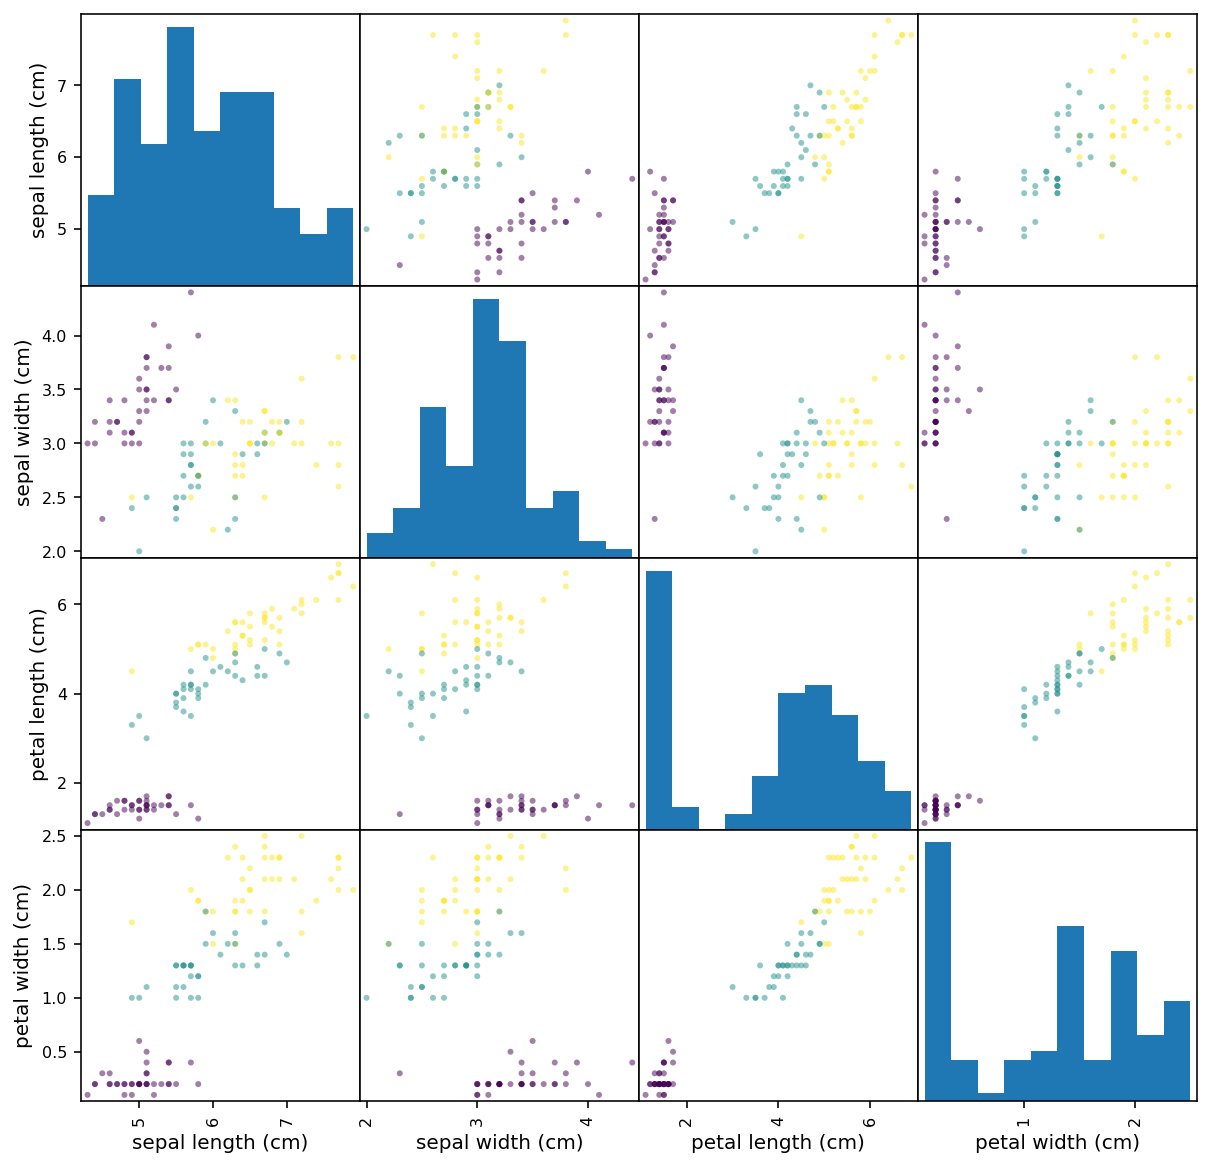

In [ ]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
import pandas as pd

iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
#열의 이름을 나오게 하고 싶은 경우 columns=iris_dataset.feature_names
iris_df.head()

pd.plotting.scatter_matrix(iris_df, c=y_train,  figsize=(10,10))

In [ ]:
# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# iris data loading

iris = sns.load_dataset('iris')


type(iris)

#바로 데이터 프레임으로 옴

pandas.core.frame.DataFrame

In [ ]:
iris.head()

#자세히 보면 cm 빠져있고 5번째 y값이 들어가 있음 species



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

# sepal_length	sepal_width	petal_length	petal_width	species
# 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이, 품종
X = iris.iloc[:, :4]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 75% : 25%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

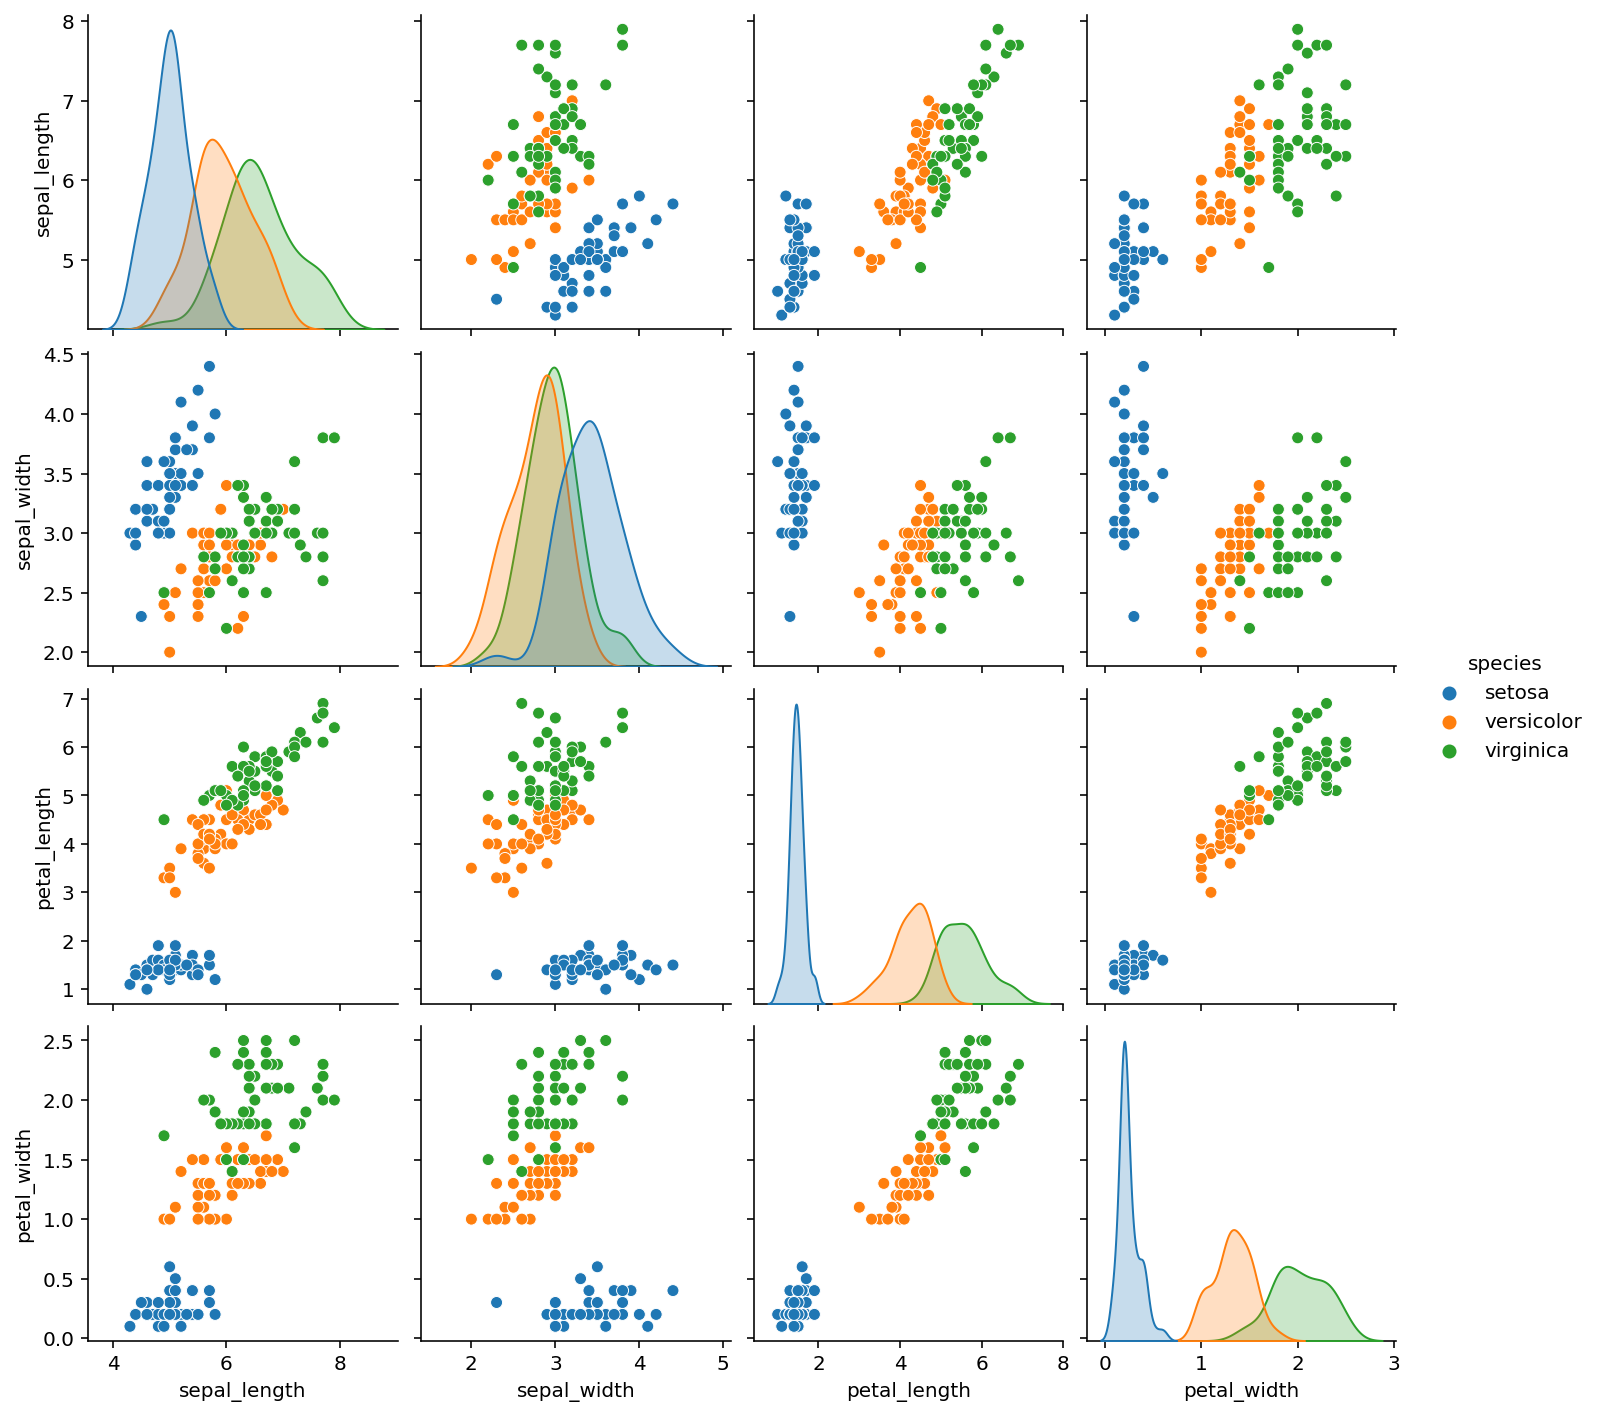

In [ ]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
sns.pairplot(iris, hue='species')

In [ ]:
# 머신러닝 모델
# k-최근접 이웃 알고리즘
# 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k개'의 이웃을 찾는다.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# 모델 평가
# 테스트 세트 이용
from sklearn import metrics

pred = model.predict(X_test)
ac_score = metrics.accuracy_score(y_test, pred)
ac_score

0.9736842105263158

In [ ]:
import numpy as np

X_new = [[5, 2.9, 1, 0.2]]
pre = model.predict(X_new)
pre

array(['setosa'], dtype=object)

In [ ]:
#iris 데이터를 이용한 KNN 분류 실습 전체코드


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 데이터 가져오기
# iris data loading
iris = sns.load_dataset('iris')

# 훈련 데이터와 테스트 데이터 준비
# 75% : 25%
X = iris.iloc[:, :4]
y = iris.iloc[:, -1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 정답률 1.0 나옴
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

# 모델 선택과 학습
# k-최근접 이웃 알고리즘
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)
ac_score = metrics.accuracy_score(y_test, pred)
print('정답률:', ac_score)

# 예측활용
X_new = [ [5, 2.9, 1, 0.2] ]
pre = model.predict(X_new)
print('예측:', pre)

정답률: 0.8947368421052632
예측: ['setosa']


In [ ]:
#결정경계(descision boundary)
#이웃의 수를 늘릴수록 결정경계는 더 부드러워진다.
#
#이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아진다.



import platform
from matplotlib import font_manager, rc 
import matplotlib


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


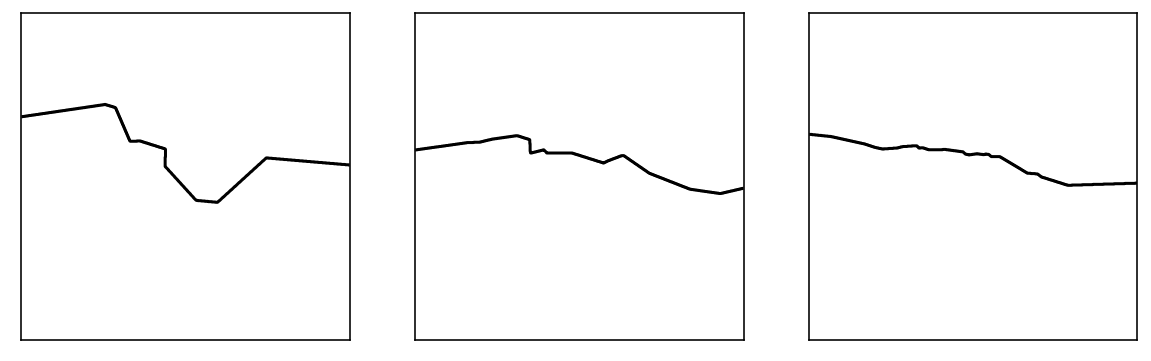

In [ ]:
# KNeighborsClassifier 분석
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X, y)
  mglearn.plots.plot_2d_separator(model, X, ax=ax)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


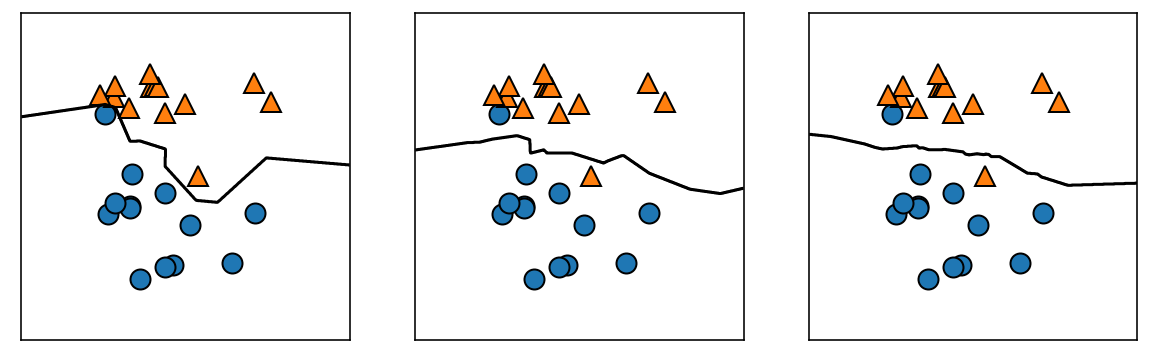

In [ ]:

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X, y)
  mglearn.plots.plot_2d_separator(model, X, ax=ax)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0, flags=flags)


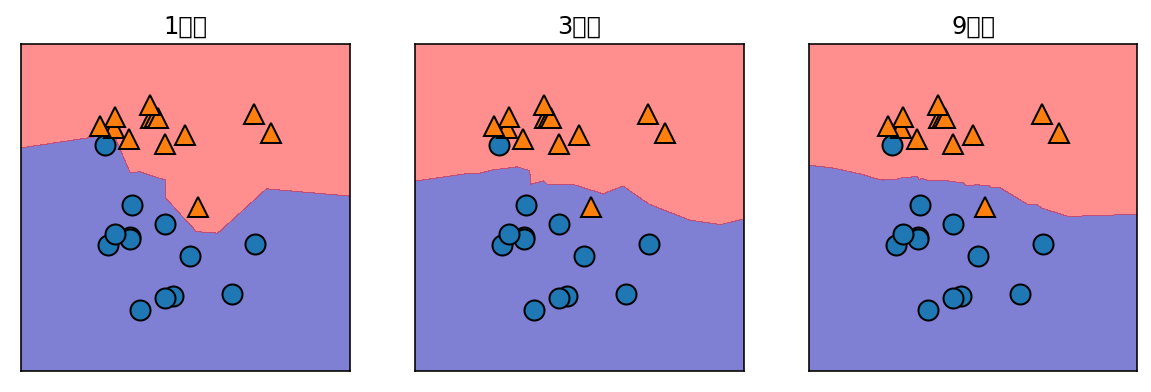

In [ ]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X, y)
  mglearn.plots.plot_2d_separator(model, X, ax=ax, fill=True, alpha=0.5)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(f'{n}이웃')

  #폰트 한국어 설정이 안돼서 안뜨는 듯

  #모델복잡도가 낮으면 일반회 되지 않고 #모델복잡도가 높으면 일반화 되기가 쉽다.

In [ ]:
#zip 간단히 설명

a = [1, 3, 5]
b = ["kim", 'lee', 'park']
print( list(zip (b, a)) )
print( list(enumerate(zip (b, a))) )

[('kim', 1), ('lee', 3), ('park', 5)]
[(0, ('kim', 1)), (1, ('lee', 3)), (2, ('park', 5))]


In [ ]:
#유방암 데이터 셋

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
print(type(cancer))
print("="*30)
#데이터의 열의 개수
print( cancer.keys() )
print("="*30)
print( cancer.target_names )
#['malignant' 'benign']
print("="*30)
print( cancer.target )
print("="*30)
print( cancer.target.shape )
print("="*30)
print( cancer.data.shape )
print("="*30)
print( cancer.data[:3] )
print("="*30)
print( cancer.feature_names )

print( len(cancer.feature_names))

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1

In [ ]:
import numpy as np

# 양성과 악성 데이터의 수
# zip() : 2개의 데이터를 연결
# bincount() : 클래스별 개수를 반환
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
  print({n:v})

{'malignant': 212}
{'benign': 357}


In [ ]:
# 특성의 명칭
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# 훈련 데이터와 테스트 데이터 분리
# stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. 
# stratify 값을 target으로 지정해주면 
# 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. 
# (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고
#  classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

X = cancer.data
Y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=0)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [ ]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=0)
X_train.shape, X_test.shape

((426, 30), (143, 30))